In [40]:
# ==========================================
# 1. Import libraries
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [41]:
# ==========================================
# 2. Load dataset
# ==========================================
df = pd.read_csv("student_habits_performance.csv")
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [42]:
# ==========================================
# 3. Define features and target
# ==========================================

target_col = "exam_score"

# Numeric features
numeric_features = [
    "age",
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "sleep_hours",
    "exercise_frequency",
    "attendance_percentage",
    "mental_health_rating"
]

# Categorical features (adjust if needed)
categorical_features = [
    "gender",
    "diet_quality",
    "part_time_job",
    "extracurricular_participation",
    "parental_education_level",
    "internet_quality"
]

X = df[numeric_features + categorical_features]
y = df[target_col]


In [43]:
# ==========================================
# 4. Train-test split
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (800, 14)
Test size: (200, 14)


In [44]:
# ==========================================
# 5. Preprocessing pipelines
# ==========================================
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [45]:
# ==========================================
# 6. Linear Regression model pipeline
# ==========================================
linear_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("regressor", LinearRegression())
    ]
)

# Train model
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred = linear_model.predict(X_test)


In [46]:
# ==========================================
# 7. Evaluation metrics
# ==========================================
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("===== Linear Regression Results =====")
print("MSE :", mse)
print("MAE :", mae)
print("R2  :", r2)


===== Linear Regression Results =====
MSE : 26.476236454969218
MAE : 4.1893110546276
R2  : 0.89675026403802


In [47]:
# ==========================================
# 8. Extract feature coefficients
# ==========================================

# Get one-hot feature names
cat_feature_names = list(
    linear_model.named_steps["preprocess"]
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
)

# Combine all feature names
all_feature_names = numeric_features + cat_feature_names

# Coefficients
coef = linear_model.named_steps["regressor"].coef_

coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coef
})

# Sort by absolute value
coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values(by="abs_coef", ascending=False)
coef_df.head(15)


,feature,coefficient,abs_coef
1,study_hours_per_day,14.144736,14.144736
7,mental_health_rating,5.564302,5.564302
2,social_media_hours,-3.133815,3.133815
5,exercise_frequency,2.656236,2.656236
3,netflix_hours,-2.534400,2.534400
4,sleep_hours,2.421586,2.421586
6,attendance_percentage,1.359685,1.359685
11,diet_quality_Fair,0.501556,0.501556
18,parental_education_level_Bachelor,0.497686,0.497686
10,gender_Other,0.495707,0.495707


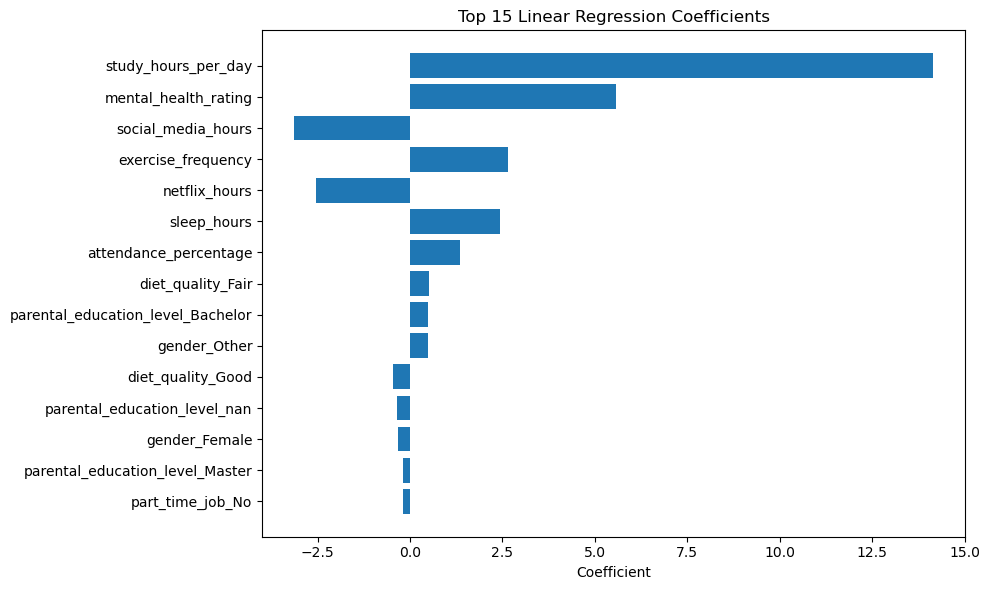

In [48]:
# ==========================================
# 9. Plot top coefficients
# ==========================================

top_n = 15
top_df = coef_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_df["feature"][::-1], top_df["coefficient"][::-1])
plt.xlabel("Coefficient")
plt.title("Top {} Linear Regression Coefficients".format(top_n))
plt.tight_layout()
plt.show()


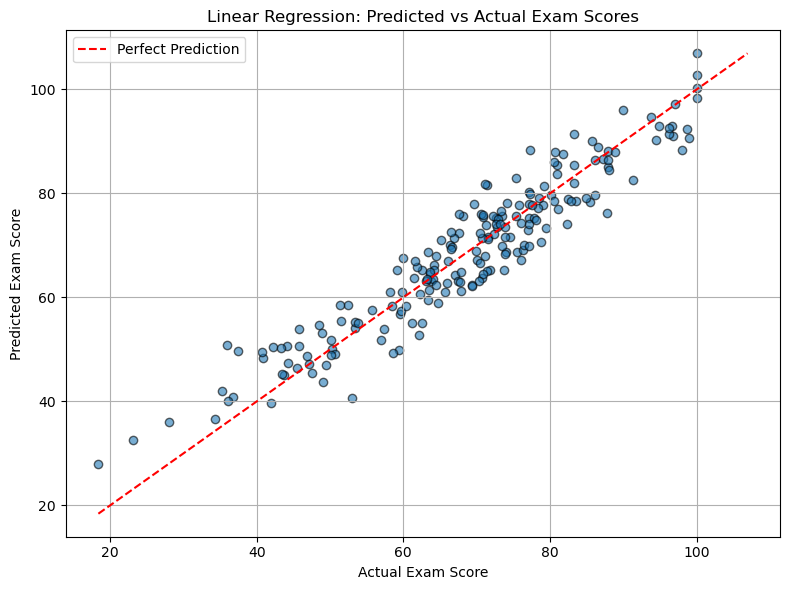

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Predict values
y_pred = linear_model.predict(X_test)

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')

# Reference line (perfect prediction)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Linear Regression: Predicted vs Actual Exam Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
